<a href="https://colab.research.google.com/github/alienmind/monkeyisland-swordmaster-gpt3/blob/main/swordmaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

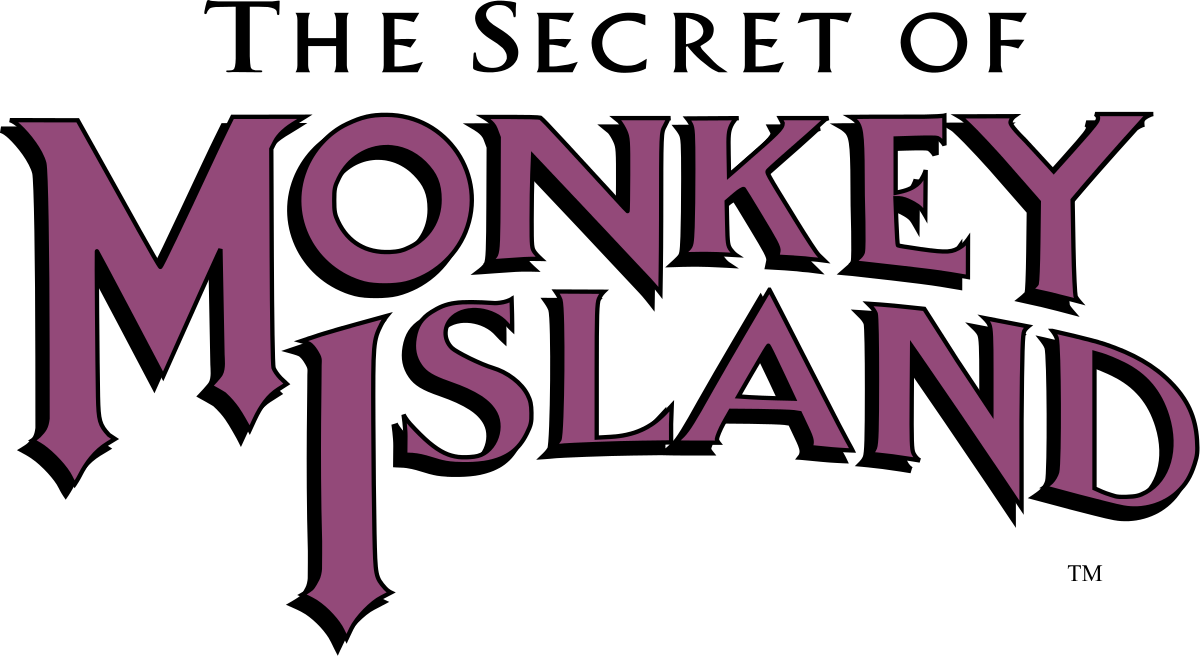

Sword Master simulator!

Clever comebacks generator based on GPT-3

**Part I**

---

Processing insults from The Secret of Monkey Island - including swordmaster comebacks!

In [82]:
### Setup environment variables processing
!pip install python-dotenv
%load_ext dotenv

## Setup openai
!pip install --upgrade openai

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [3]:
### Open Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_root = '/content/drive/My Drive/Swordmaster/'

Mounted at /content/drive


In [134]:
### Cleanup data
import pandas as pd
# Original from https://monkeyisland.fandom.com/wiki/Insult_Sword_Fighting#Sword_Masters
df = pd.read_csv(data_root + 'insults.csv', delimiter=';')
df.columns = ["prompt","completion"]
df[df.columns] = df.apply(lambda x: x.str.strip())
df.dropna()


,prompt,completion
0,You fight like a dairy Farmer!,How appropriate. You fight like a cow!
1,"This is the END for you, you gutter crawling cur!","And I've got a little TIP for you, get the POINT?"
2,I've spoken with apes more polite than you!,I'm glad to hear you attended your family reun...
3,Soon you'll be wearing my sword like a shish k...,First you'd better stop waving it like a feath...
4,People fall at my feet when they see me coming!,Even BEFORE they smell your breath?
5,I'm not going to take your insolence sitting d...,Your hemorrhoids are flaring up again eh?
6,I once owned a dog that was smarter than you.,He must have taught you everything you know.
7,Nobody's ever drawn blood from me and nobody e...,You run THAT fast?
8,Have you stopped wearing diapers yet?,Why? Did you want to borrow one?
9,There are no words for how disgusting you are.,"Yes, there are. You just never learned them."


In [135]:
import json

### Convert to JSONL as expected by OpenAPI
#{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
def df_to_dataset(df : pd.DataFrame, output_file : str):
  with open(data_root + '/' + output_file, mode='w') as f:
    print(df.to_json(orient='records', lines=True), file=f, flush=False)

def decorate_prompt(prompt : str):
  return prompt + " ->"

def decorate_completion(completion : str):
  return " " + completion  + " \n"

def dataset_decorate(input_file : str, output_file : str):
  df = pd.read_json(data_root + '/' + input_file, lines=True)
  df['prompt'] = decorate_prompt(df['prompt'].astype(str))
  df['completion'] = decorate_completion(df['completion'].astype(str))
  with open(data_root + '/' + output_file, mode='w') as f:
    print(df.to_json(orient='records', lines=True), file=f, flush=False)      

# Remove invalid trailing jsonl lines as created by to_json()
def dataset_cleanup(input_file : str, output_file : str):
  with open(data_root + '/' + input_file, mode='r') as f:
    with open(data_root + '/' + output_file, mode='w') as fw:
      n : int = 0
      line : str = ""
      for line in f:
          try:
            json.loads(line)
            fw.write(line)
            n = n + 1
          except Exception as e:
            ##print(f"Invalid line {n} : {line}")
            pass

In [136]:
df_to_dataset(df,'insults.jsonl')
dataset_decorate('insults.jsonl','insults0.jsonl')
dataset_cleanup('insults0.jsonl', 'insults1.jsonl') 

**Part II**

---

Spicing it up with COMI insults and comebacks


In [137]:
### Cleanup data
import pandas as pd
#https://monkeyisland.fandom.com/wiki/Insult_Sword_Fighting
dfcomi = pd.read_csv(data_root + 'comi-insults.csv', delimiter=',')
dfcomi[dfcomi.columns] = dfcomi.apply(lambda x: x.str.strip())
dfcomi.dropna()

,Insult,Renee Rottingham's Insults,Comeback
0,Every enemy I've met I've annihilated!,My attacks have left entire islands depopulated!,"With your breath, I'm sure they all suffocated."
1,You're as repulsive as a monkey in a negligee.,You have the sex appeal of a Shar-Pei.,I look THAT much like your fiancée?
2,Killing you would be justifiable homicide!,"When I'm done, your body will be rotted and pu...",Then killing you must be justifiable fungicide.
3,You're the ugliest monster ever created!,Your looks would make pigs nauseated.,If you don't count all the ones you've dated.
4,I'll skewer you like a sow at a buffet!,Your lips look like they belong on catch of th...,"When I'm done with you, you'll be a boneless f..."
5,"Would you like to be buried, or cremated?","I give you a choice. You can be gutted, or dec...","With you around, I'd prefer to be fumigated."
6,Coming face to face with me must leave you pet...,Never before have I seen someone so sissified!,Is that your face? I thought it was your backs...
7,"When your father first saw you, he must have b...","You're a disgrace to your species, you're so u...",At least mine can be identified.
8,You can't match my witty repartee!,Nothing can stop me from blowing you away!,"I could, if you would use some breath spray."
9,I have never seen such clumsy swordplay!,I have never lost to a melee!,"You would have, but you were always running away."


In [139]:
# Now, being a three-way insult + Renee's comeback + final comeback, we can easily generate two datasets
dfcomi.columns = ["insult","renee comeback","comeback"]
df1 = dfcomi[["insult","renee comeback"]]
df1.columns = ["prompt","completion"]
df2 = dfcomi[["renee comeback","comeback"]]
df2.columns = ["prompt","completion"]

In [140]:
df_to_dataset(df1, 'comi-insults.jsonl')
dataset_decorate('comi-insults.jsonl','comi-insults0.jsonl')     
dataset_cleanup('comi-insults0.jsonl', 'comi-insults1.jsonl') 

In [141]:
df_to_dataset(df2,'comi2-insults.jsonl')
dataset_decorate('comi2-insults.jsonl','comi2-insults0.jsonl')     
dataset_cleanup('comi2-insults0.jsonl', 'comi2-insults1.jsonl') 

In [142]:
fulldf = pd.concat([df,df1,df2],ignore_index=True)

In [143]:
df_to_dataset(fulldf,'full-insults.jsonl')
dataset_decorate('full-insults.jsonl','full-insults0.jsonl')     
dataset_cleanup('full-insults0.jsonl', 'full-insults1.jsonl') 

**Part III**

---

Training!

In [ ]:
## Process API keys and other variables
import dotenv
import os
dotenv.load_dotenv(os.path.join(data_root, 'variables.env'))
print(os.getenv('OPENAI_API_KEY'))

In [166]:
# Train!
!openai api fine_tunes.create -t '{data_root}/full-insults1.jsonl'  -m ada --suffix "Monkey Island Insults"

Logging requires wandb to be installed. Run `pip install wandb`.
Found potentially duplicated files with name 'full-insults1.jsonl', purpose 'fine-tune' and size 8704 bytes
file-igcCTzXVZWXacJCvYCygoxXm
file-IA11EbyxTN0KQcz5BhmKTvPb
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: 
Upload progress: 100% 8.70k/8.70k [00:00<00:00, 13.3Mit/s]
Uploaded file from /content/drive/My Drive/Swordmaster//full-insults1.jsonl: file-bediqRMgJS36QLwZCQjyXvq7
Created fine-tune: ft-7634Q78dDjD9Szn4VMWJzgcU
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2022-05-14 23:48:32] Created fine-tune: ft-7634Q78dDjD9Szn4VMWJzgcU
[2022-05-14 23:48:45] Fine-tune costs $0.00
[2022-05-14 23:48:46] Fine-tune enqueued. Queue number: 0
[2022-05-14 23:48:49] Fine-tune started
[2022-05-14 23:49:13] Completed epoch 1/4
[2022-05-14 23:49:23] Completed epoch 2/4
[2022-05-14 23:49:34] Completed epoch 3/4
[202

In [167]:
## You need to capture your ftid / modelid as follows
FTID = "ft-7634Q78dDjD9Szn4VMWJzgcU"
#MODELID = "curie:ft-alienmind:monkey-island-insults-2022-05-14-23-17-09"
MODELID = "ada:ft-alienmind:monkey-island-insults-2022-05-14-23-50-04"

In [168]:
!openai api fine_tunes.follow -i {FTID}

Logging requires wandb to be installed. Run `pip install wandb`.
[2022-05-14 23:48:32] Created fine-tune: ft-7634Q78dDjD9Szn4VMWJzgcU
[2022-05-14 23:48:45] Fine-tune costs $0.00
[2022-05-14 23:48:46] Fine-tune enqueued. Queue number: 0
[2022-05-14 23:48:49] Fine-tune started
[2022-05-14 23:49:13] Completed epoch 1/4
[2022-05-14 23:49:23] Completed epoch 2/4
[2022-05-14 23:49:34] Completed epoch 3/4
[2022-05-14 23:49:44] Completed epoch 4/4
[2022-05-14 23:50:06] Uploaded model: ada:ft-alienmind:monkey-island-insults-2022-05-14-23-50-04
[2022-05-14 23:50:09] Uploaded result file: file-QpDSv0RgThsmltUxR7glQIyF
[2022-05-14 23:50:09] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-alienmind:monkey-island-insults-2022-05-14-23-50-04 -p <YOUR_PROMPT>


Now, let's test with some new insults!

In [169]:
!openai api completions.create -m {MODELID} -p "You fight like a cow ->"

Logging requires wandb to be installed. Run `pip install wandb`.
You fight like a cow -> You fight like a dog! 

Heylook at that 
bo

In [170]:
# Predict!

import openai
import os

ft_model = MODELID
openai.api_key = os.getenv('OPENAI_API_KEY')

def generate_comeback(insult : str) -> str :
  res = openai.Completion.create(model=ft_model, prompt=decorate_prompt(insult), temperature=0.9)
  return res["choices"][0]["text"].split("\n")[0]

# Create a comeback matrix
comebacks = pd.DataFrame(columns=["comeback"],data=[generate_comeback(i) for i in fulldf['prompt']])
    

In [171]:
testdf = pd.DataFrame(columns=["insult","comeback","predicted"])
testdf[testdf.columns] = fulldf.join(comebacks)

In [172]:
testdf

,insult,comeback,predicted
0,You fight like a dairy Farmer!,How appropriate. You fight like a cow!,How appropriate. You fight like a cow!
1,"This is the END for you, you gutter crawling cur!","And I've got a little TIP for you, get the POINT?","And I've got a bit of TIP for you, get the POINT"
2,I've spoken with apes more polite than you!,I'm glad to hear you attended your family reun...,I'm glad to hear you attended your family reu...
3,Soon you'll be wearing my sword like a shish k...,First you'd better stop waving it like a feath...,First you'd better stop waving it like a feat...
4,People fall at my feet when they see me coming!,Even BEFORE they smell your breath?,Even BEFORE they smell your breath?
...,...,...,...
64,My skills with a sword are highly venerated!,Too bad they're all fabricated.,Too bad no one's ever heard of YOU at all.
65,Your stench would make an outhouse cleaner irr...,Then perhaps you should switch to decaffeinated.,Then perhaps you should switch to decaffeinat...
66,I can't tell you which of my traits leaves you...,"Your odor alone makes me aggravated, agitated,...",My odor alone makes you tense? aggravated any...
67,Nothing on this Earth can save your sorry hide!,The only way you'll be preserved is in formald...,You run that fast?


In [10]:
## Close drive
drive.flush_and_unmount()

**Part IV**


---

Fight!

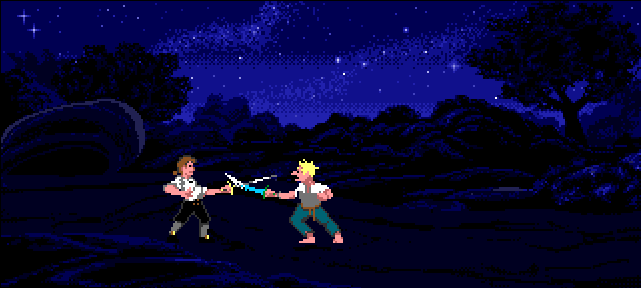

In [173]:
from IPython.display import Image
Image(open(data_root + '/insult.gif','rb').read())

In [ ]:
while True:
  l = input("Type your insult > ")
  print("Response: " + generate_comeback(decorate_prompt(l)))

In [ ]:
# https://parade.com/1105374/marynliles/good-comebacks/